In [1]:
import pandas as pd

merged_data_rick_and_morty = pd.read_excel("13.Rick and Morty API Data.xlsx", sheet_name="MergedData")


In [2]:
merged_data_rick_and_morty

,character_id,character_name,status,species,type,gender,episode_count,origin_id,origin_type,origin_dimension,location_id,location_type,location_dimension
0,1,Rick Sanchez,Alive,Human,NaN,Male,51,1.0,Planet,Dimension C-137,3.0,Space station,unknown
1,2,Morty Smith,Alive,Human,NaN,Male,51,NaN,NaN,NaN,3.0,Space station,unknown
2,3,Summer Smith,Alive,Human,NaN,Female,42,20.0,Planet,Replacement Dimension,20.0,Planet,Replacement Dimension
3,4,Beth Smith,Alive,Human,NaN,Female,42,20.0,Planet,Replacement Dimension,20.0,Planet,Replacement Dimension
4,5,Jerry Smith,Alive,Human,NaN,Male,39,20.0,Planet,Replacement Dimension,20.0,Planet,Replacement Dimension
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,Young Jerry,unknown,Human,NaN,Male,1,30.0,Planet,unknown,30.0,Planet,unknown
822,823,Young Beth,unknown,Human,NaN,Female,1,30.0,Planet,unknown,30.0,Planet,unknown
823,824,Young Beth,unknown,Human,NaN,Female,1,30.0,Planet,unknown,30.0,Planet,unknown
824,825,Young Jerry,unknown,Human,NaN,Male,1,30.0,Planet,unknown,30.0,Planet,unknown


In [3]:
#Looking at each of the workbooks in my spreadsheet
xls = pd.ExcelFile("13.Rick and Morty API Data.xlsx")
print(xls.sheet_names)


['Characters', 'Episodes', 'Locations', 'MergedData']


In [5]:
import os

#Checking what Excel Files exist in the Direcorty this Code file is saved in
files = [f for f in os.listdir() if f.endswith((".xlsx", ".xls"))]
print(files)


['13.Rick and Morty API Data.xlsx']


In [6]:
import os

#Looking at all file names and their extensions in the directory this code file in saved in
files = os.listdir()
for f in files:
    print(f)


1.Create Python API.ipynb
10.Learning About APIs.ipynb
11.Learning About APIs PART 2.ipynb
12.API Play in Python.ipynb
13.Rick and Morty API Data.xlsx
13.Rick and Morty Data from API.ipynb
14.Counting Episodes per Character.ipynb
15.Playing with Duplicates Rick and Morty Data.ipynb
16.Playing with Rick and Morty Data Extended.ipynb
17.Playing with Rick and Morty Data Extended - Copy.ipynb
2.Get Pokemon API Data.ipynb
3.Get Pokemon API Data PART 2.ipynb
4.Pokemon Quiz Generator with Data from API.ipynb
5.Create Python API Rick and Morty.ipynb
6.Create Python API Request.ipynb
7.Post Requests in Python.ipynb
8.Post Requests API in Python.ipynb
9.Get and Post API Requests in Python.ipynb


In [7]:
# Count all missing values in the entire DataFrame
# df.isnull() creates a True/False mask for each cell
# .sum() on that mask counts True values per column
# another .sum() adds all column counts together
total_nulls = merged_data_rick_and_morty.isnull().sum().sum()
print(total_nulls)


1384


In [8]:
# Count missing values for each column individually
# This helps you see which columns need cleaning
nulls_per_column = merged_data_rick_and_morty.isnull().sum()
print(nulls_per_column)


character_id            0
character_name          0
status                  0
species                 0
type                  401
gender                  0
episode_count           0
origin_id             300
origin_type           302
origin_dimension      303
location_id            21
location_type          23
location_dimension     34
dtype: int64


In [9]:
# Loop through each column and print the missing value percentage
for col in merged_data_rick_and_morty.columns:
    # Calculate percentage of missing values for this column
    missing_pct = merged_data_rick_and_morty[col].isnull().mean() * 100
    
    # Print in the format you requested
    print(f"{col}: Missing values percentage = {missing_pct:.2f}%")


character_id: Missing values percentage = 0.00%
character_name: Missing values percentage = 0.00%
status: Missing values percentage = 0.00%
species: Missing values percentage = 0.00%
type: Missing values percentage = 48.55%
gender: Missing values percentage = 0.00%
episode_count: Missing values percentage = 0.00%
origin_id: Missing values percentage = 36.32%
origin_type: Missing values percentage = 36.56%
origin_dimension: Missing values percentage = 36.68%
location_id: Missing values percentage = 2.54%
location_type: Missing values percentage = 2.78%
location_dimension: Missing values percentage = 4.12%


In [10]:
# Count missing values for each row
# axis=1 means "operate across columns"
nulls_per_row = merged_data_rick_and_morty.isnull().sum(axis=1)
print(nulls_per_row)


0      1
1      4
2      1
3      1
4      1
      ..
821    1
822    1
823    1
824    1
825    0
Length: 826, dtype: int64


In [11]:
# Build a clean summary DataFrame showing:
# - how many nulls each column has
# - what percentage of the column is missing
null_summary = pd.DataFrame({
    "null_count": merged_data_rick_and_morty.isnull().sum(),
    "null_percent": merged_data_rick_and_morty.isnull().mean() * 100
})

print(null_summary)


                    null_count  null_percent
character_id                 0      0.000000
character_name               0      0.000000
status                       0      0.000000
species                      0      0.000000
type                       401     48.547215
gender                       0      0.000000
episode_count                0      0.000000
origin_id                  300     36.319613
origin_type                302     36.561743
origin_dimension           303     36.682809
location_id                 21      2.542373
location_type               23      2.784504
location_dimension          34      4.116223


In [12]:
# Count total number of null values in the entire DataFrame
total_nulls = merged_data_rick_and_morty.isnull().sum().sum()

# Count nulls per column
nulls_per_column = merged_data_rick_and_morty.isnull().sum()

# Calculate what percentage of ALL nulls come from each column
# (column_nulls / total_nulls) * 100
null_percentage_of_total = (nulls_per_column / total_nulls) * 100

# Print results in a readable format
for col, pct in null_percentage_of_total.items():
    print(f"{col}: contributes {pct:.2f}% of all missing values in the dataset")


character_id: contributes 0.00% of all missing values in the dataset
character_name: contributes 0.00% of all missing values in the dataset
status: contributes 0.00% of all missing values in the dataset
species: contributes 0.00% of all missing values in the dataset
type: contributes 28.97% of all missing values in the dataset
gender: contributes 0.00% of all missing values in the dataset
episode_count: contributes 0.00% of all missing values in the dataset
origin_id: contributes 21.68% of all missing values in the dataset
origin_type: contributes 21.82% of all missing values in the dataset
origin_dimension: contributes 21.89% of all missing values in the dataset
location_id: contributes 1.52% of all missing values in the dataset
location_type: contributes 1.66% of all missing values in the dataset
location_dimension: contributes 2.46% of all missing values in the dataset


In [13]:
#For datasets that might contain no null values
total_nulls = merged_data_rick_and_morty.isnull().sum().sum()

if total_nulls == 0:
    print("No missing values in the dataset.")
else:
    nulls_per_column = merged_data_rick_and_morty.isnull().sum()
    null_percentage_of_total = (nulls_per_column / total_nulls) * 100

    for col, pct in null_percentage_of_total.items():
        print(f"{col}: contributes {pct:.2f}% of all missing values in the dataset")


character_id: contributes 0.00% of all missing values in the dataset
character_name: contributes 0.00% of all missing values in the dataset
status: contributes 0.00% of all missing values in the dataset
species: contributes 0.00% of all missing values in the dataset
type: contributes 28.97% of all missing values in the dataset
gender: contributes 0.00% of all missing values in the dataset
episode_count: contributes 0.00% of all missing values in the dataset
origin_id: contributes 21.68% of all missing values in the dataset
origin_type: contributes 21.82% of all missing values in the dataset
origin_dimension: contributes 21.89% of all missing values in the dataset
location_id: contributes 1.52% of all missing values in the dataset
location_type: contributes 1.66% of all missing values in the dataset
location_dimension: contributes 2.46% of all missing values in the dataset


In [14]:

# ---------------------------------------------------------
# 1. Extract the character names column
#    (Assuming the column is called "name" in your dataset)
# ---------------------------------------------------------
character_names = merged_data_rick_and_morty["character_name"].tolist()

# ---------------------------------------------------------
# 2. Display all character names
# ---------------------------------------------------------
print("List of all character names:")
for name in character_names:
    print(name)

# ---------------------------------------------------------
# 3. Count how many characters there are
# ---------------------------------------------------------
total_characters = len(character_names)
print(f"\nTotal number of characters: {total_characters}")


List of all character names:
Rick Sanchez
Morty Smith
Summer Smith
Beth Smith
Jerry Smith
Abadango Cluster Princess
Abradolf Lincler
Adjudicator Rick
Agency Director
Alan Rails
Albert Einstein
Alexander
Alien Googah
Alien Morty
Alien Rick
Amish Cyborg
Annie
Antenna Morty
Antenna Rick
Ants in my Eyes Johnson
Aqua Morty
Aqua Rick
Arcade Alien
Armagheadon
Armothy
Arthricia
Artist Morty
Attila Starwar
Baby Legs
Baby Poopybutthole
Baby Wizard
Bearded Lady
Beebo
Benjamin
Bepisian
Beta-Seven
Beth Sanchez
Beth Smith
Beth Smith
Beth's Mytholog
Big Boobed Waitress
Big Head Morty
Big Morty
Body Guard Morty
Bill
Bill
Birdperson
Black Rick
Blamph
Blim Blam
Blue Diplomat
Blue Footprint Guy
Blue Shirt Morty
Bobby Moynihan
Boobloosian
Bootleg Portal Chemist Rick
Borpocian
Brad
Brad Anderson
Calypso
Campaign Manager Morty
Canklanker Thom
Centaur
Chris
Chris
Coach Feratu (Balik Alistane)
Collector
Colossus
Commander Rick
Concerto
Conroy
Cool Rick
Cop Morty
Cop Rick
Courier Flap
Cousin Nicky
Cowboy Morty

✅ False
The row is NOT a duplicate — this is the first time pandas has seen this exact combination of values.

✅ True
The row IS a duplicate — pandas has seen an identical row earlier in the DataFrame.

In [15]:
#Turn character_name into something that the pandas dataframe can work with
character_names1 = pd.DataFrame(character_names)
#Store 
duplicates = character_names1.duplicated()

print(duplicates)



0      False
1      False
2      False
3      False
4      False
       ...  
821    False
822    False
823     True
824     True
825    False
Length: 826, dtype: bool


In [16]:
# Get count of duplicates in a single column using dataframe.pivot_table()
df2 = merged_data_rick_and_morty.pivot_table(index = ['character_name'], aggfunc ='size')
print("Get count of duplicate values in a single column:\n", df2)

Get count of duplicate values in a single column:
 character_name
26 Years Old Morty           1
40 Years Old Morty           1
7+7 Years Old Morty          1
80's snake                   1
Abadango Cluster Princess    1
                            ..
Zarbadar Gloonch             1
Zarbadar's Mytholog          1
Zeep Xanflorp                1
Zeta Alpha Rick              1
Zick Zack                    1
Length: 757, dtype: int64


In [17]:
character_names2 = pd.DataFrame(character_names)
character_names2 = character_names2.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [18]:
character_names2

,0
0,Rick Sanchez
1,Morty Smith
2,Summer Smith
3,Beth Smith
4,Jerry Smith
...,...
819,Redhead Morty
820,Gotron
821,Young Jerry
822,Young Beth


In [19]:
character_names1

,0
0,Rick Sanchez
1,Morty Smith
2,Summer Smith
3,Beth Smith
4,Jerry Smith
...,...
821,Young Jerry
822,Young Beth
823,Young Beth
824,Young Jerry


In [20]:
# Count how many rows are duplicates of a previous row
duplicate_row_count_after_duplicates_removal = character_names2.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_row_count_after_duplicates_removal}")


Number of duplicate rows: 0


In [21]:
# Count how many rows are duplicates of a previous row
duplicate_row_count_before_duplicates_removal = character_names1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_row_count_before_duplicates_removal}")


Number of duplicate rows: 69


In [22]:
# Count how many duplicate values each column contains
duplicate_counts = merged_data_rick_and_morty.apply(lambda col: col.duplicated().sum())

print("Duplicate counts per column:")
print(duplicate_counts)


Duplicate counts per column:
character_id            0
character_name         69
status                823
species               816
type                  656
gender                822
episode_count         813
origin_id             729
origin_type           796
origin_dimension      793
location_id           731
location_type         787
location_dimension    805
dtype: int64


In [23]:
# Count how many unique values each column contains
unique_counts = merged_data_rick_and_morty.nunique()

print("Unique value counts per column:")
print(unique_counts)


Unique value counts per column:
character_id          826
character_name        757
status                  3
species                10
type                  169
gender                  4
episode_count          13
origin_id              96
origin_type            29
origin_dimension       32
location_id            94
location_type          38
location_dimension     20
dtype: int64


In [24]:
# Count how many entries each column has BEFORE removing duplicates
before_counts = merged_data_rick_and_morty.count()

print("Entries per column BEFORE removing duplicates:")
print(before_counts)


Entries per column BEFORE removing duplicates:
character_id          826
character_name        826
status                826
species               826
type                  425
gender                826
episode_count         826
origin_id             526
origin_type           524
origin_dimension      523
location_id           805
location_type         803
location_dimension    792
dtype: int64


In [25]:
# Remove duplicate rows based on ALL columns
merged_data_rick_and_morty_no_duplicates = merged_data_rick_and_morty.drop_duplicates()


In [26]:
# Count how many entries each column has AFTER removing duplicates
after_counts = merged_data_rick_and_morty_no_duplicates.count()

print("\nEntries per column AFTER removing duplicates:")
print(after_counts)



Entries per column AFTER removing duplicates:
character_id          826
character_name        826
status                826
species               826
type                  425
gender                826
episode_count         826
origin_id             526
origin_type           524
origin_dimension      523
location_id           805
location_type         803
location_dimension    792
dtype: int64


In [27]:
# Count how many null (missing) values each column contains
null_counts = merged_data_rick_and_morty.isnull().sum()

print("Null entries per column:")
print(null_counts)


Null entries per column:
character_id            0
character_name          0
status                  0
species                 0
type                  401
gender                  0
episode_count           0
origin_id             300
origin_type           302
origin_dimension      303
location_id            21
location_type          23
location_dimension     34
dtype: int64


In [28]:
null_percentages = merged_data_rick_and_morty.isnull().mean() * 100
print(null_percentages)


character_id           0.000000
character_name         0.000000
status                 0.000000
species                0.000000
type                  48.547215
gender                 0.000000
episode_count          0.000000
origin_id             36.319613
origin_type           36.561743
origin_dimension      36.682809
location_id            2.542373
location_type          2.784504
location_dimension     4.116223
dtype: float64


In [29]:
import pandas as pd

df = merged_data_rick_and_morty  # your dataset

# ---------------------------------------------------------
# 1. Count duplicates per column
#    .duplicated() marks True for every value that has appeared before
# ---------------------------------------------------------
duplicates_per_column = df.apply(lambda col: col.duplicated().sum())

# ---------------------------------------------------------
# 2. Count total duplicates across the entire dataset
# ---------------------------------------------------------
total_duplicates = duplicates_per_column.sum()

# ---------------------------------------------------------
# 3. Calculate what percentage of ALL duplicates
#    each column contributes
# ---------------------------------------------------------
duplicate_percentage = (duplicates_per_column / total_duplicates) * 100

# ---------------------------------------------------------
# 4. Display results
# ---------------------------------------------------------
print("Percentage of all duplicates contributed by each column:")
print(duplicate_percentage.round(2))


Percentage of all duplicates contributed by each column:
character_id          0.00
character_name        0.80
status                9.53
species               9.44
type                  7.59
gender                9.51
episode_count         9.41
origin_id             8.44
origin_type           9.21
origin_dimension      9.18
location_id           8.46
location_type         9.11
location_dimension    9.32
dtype: float64


In [30]:
import pandas as pd

df = merged_data_rick_and_morty  # your dataset

# ---------------------------------------------------------
# 1. Count duplicates per column
# ---------------------------------------------------------
duplicates_per_column = df.apply(lambda col: col.duplicated().sum())

# ---------------------------------------------------------
# 2. Count total entries per column (non-null)
# ---------------------------------------------------------
total_entries_per_column = df.count()

# ---------------------------------------------------------
# 3. Duplicate percentage per column
#    (duplicates in column / total entries in column) * 100
# ---------------------------------------------------------
duplicate_percentage_per_column = (duplicates_per_column / total_entries_per_column) * 100

# ---------------------------------------------------------
# 4. Total duplicates across the entire dataset
# ---------------------------------------------------------
total_duplicates_dataset = duplicates_per_column.sum()

# ---------------------------------------------------------
# 5. Percentage of all duplicates contributed by each column
# ---------------------------------------------------------
percentage_of_all_duplicates = (duplicates_per_column / total_duplicates_dataset) * 100

# ---------------------------------------------------------
# 6. Build the summary table
# ---------------------------------------------------------
duplicate_summary = pd.DataFrame({
    "duplicates_per_column": duplicates_per_column,
    "duplicate_percentage_per_column": duplicate_percentage_per_column.round(2),
    "percentage_of_all_duplicates": percentage_of_all_duplicates.round(2)
})

print("Duplicate Summary Table:")
print(duplicate_summary)

# ---------------------------------------------------------
# 7. Display total duplicates across dataset
# ---------------------------------------------------------
total_cells = df.size  # total number of cells in the dataset
total_duplicates_percentage = (total_duplicates_dataset / total_cells) * 100

print("\nTOTAL DUPLICATES ACROSS DATASET:")
print(f"Total duplicate values: {total_duplicates_dataset}")
print(f"Percentage of all dataset cells that are duplicates: {total_duplicates_percentage:.2f}%")


Duplicate Summary Table:
                    duplicates_per_column  duplicate_percentage_per_column  \
character_id                            0                             0.00   
character_name                         69                             8.35   
status                                823                            99.64   
species                               816                            98.79   
type                                  656                           154.35   
gender                                822                            99.52   
episode_count                         813                            98.43   
origin_id                             729                           138.59   
origin_type                           796                           151.91   
origin_dimension                      793                           151.63   
location_id                           731                            90.81   
location_type                         7

In [31]:
import pandas as pd

df = merged_data_rick_and_morty  # your dataset

# ---------------------------------------------------------
# 1. Count nulls per column
# ---------------------------------------------------------
nulls_per_column = df.isnull().sum()

# ---------------------------------------------------------
# 2. Count total entries per column (non-null)
# ---------------------------------------------------------
total_entries_per_column = df.count()

# ---------------------------------------------------------
# 3. Null percentage per column
#    (nulls in column / total entries in column) * 100
# ---------------------------------------------------------
null_percentage_per_column = (nulls_per_column / len(df)) * 100

# ---------------------------------------------------------
# 4. Total nulls across the entire dataset
# ---------------------------------------------------------
total_nulls_dataset = nulls_per_column.sum()

# ---------------------------------------------------------
# 5. Percentage of all nulls contributed by each column
# ---------------------------------------------------------
percentage_of_all_nulls = (nulls_per_column / total_nulls_dataset) * 100

# ---------------------------------------------------------
# 6. Build the summary table
# ---------------------------------------------------------
null_summary = pd.DataFrame({
    "nulls_per_column": nulls_per_column,
    "null_percentage_per_column": null_percentage_per_column.round(2),
    "percentage_of_all_nulls": percentage_of_all_nulls.round(2)
})

print("Null Value Summary Table:")
print(null_summary)

# ---------------------------------------------------------
# 7. Display total nulls across dataset
# ---------------------------------------------------------
total_cells = df.size  # total number of cells in the dataset
total_nulls_percentage = (total_nulls_dataset / total_cells) * 100

print("\nTOTAL NULLS ACROSS DATASET:")
print(f"Total null values: {total_nulls_dataset}")
print(f"Percentage of all dataset cells that are null: {total_nulls_percentage:.2f}%")


Null Value Summary Table:
                    nulls_per_column  null_percentage_per_column  \
character_id                       0                        0.00   
character_name                     0                        0.00   
status                             0                        0.00   
species                            0                        0.00   
type                             401                       48.55   
gender                             0                        0.00   
episode_count                      0                        0.00   
origin_id                        300                       36.32   
origin_type                      302                       36.56   
origin_dimension                 303                       36.68   
location_id                       21                        2.54   
location_type                     23                        2.78   
location_dimension                34                        4.12   

                    p

In [32]:
import pandas as pd

df = merged_data_rick_and_morty.copy()

# ---------------------------------------------------------
# 1. Count entries per column BEFORE dropping nulls
#    .count() counts NON-null entries
# ---------------------------------------------------------
before_counts = df.count()

print("Entries per column BEFORE dropping nulls:")
print(before_counts)

# Count total entries across the dataset (non-null cells)
total_before = df.count().sum()
print(f"\nTotal non-null entries across dataset BEFORE dropping nulls: {total_before}")

# ---------------------------------------------------------
# 2. Drop rows that contain ANY null values
# ---------------------------------------------------------
df_no_nulls = df.dropna()

# ---------------------------------------------------------
# 3. Count entries per column AFTER dropping nulls
# ---------------------------------------------------------
after_counts = df_no_nulls.count()

print("\nEntries per column AFTER dropping nulls:")
print(after_counts)

# Count total entries across the dataset (non-null cells)
total_after = df_no_nulls.count().sum()
print(f"\nTotal non-null entries across dataset AFTER dropping nulls: {total_after}")


Entries per column BEFORE dropping nulls:
character_id          826
character_name        826
status                826
species               826
type                  425
gender                826
episode_count         826
origin_id             526
origin_type           524
origin_dimension      523
location_id           805
location_type         803
location_dimension    792
dtype: int64

Total non-null entries across dataset BEFORE dropping nulls: 9354

Entries per column AFTER dropping nulls:
character_id          310
character_name        310
status                310
species               310
type                  310
gender                310
episode_count         310
origin_id             310
origin_type           310
origin_dimension      310
location_id           310
location_type         310
location_dimension    310
dtype: int64

Total non-null entries across dataset AFTER dropping nulls: 4030


I do not what to get rid of duplicates across columns as they are relevant 
Characters will show up multiple times in the dataset and so on
I do not want to drop null values as that will reduce the size of my dataset drastically. 

In [33]:
# Count how many duplicate rows exist in the entire DataFrame
duplicate_row_count = merged_data_rick_and_morty.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_row_count}")


Number of duplicate rows: 0


In [34]:
# Count species and show top N
species_counts = df["species"].value_counts()
print(species_counts.head(10))

# As percentages
species_percent = df["species"].value_counts(normalize=True) * 100
print(species_percent.head(10).round(2))


species
Human                    366
Alien                    205
Humanoid                  68
Animal                    55
Robot                     51
Mythological Creature     46
unknown                   13
Poopybutthole              8
Cronenberg                 8
Disease                    6
Name: count, dtype: int64
species
Human                    44.31
Alien                    24.82
Humanoid                  8.23
Animal                    6.66
Robot                     6.17
Mythological Creature     5.57
unknown                   1.57
Poopybutthole             0.97
Cronenberg                0.97
Disease                   0.73
Name: proportion, dtype: float64


In [38]:
# If origin column contains planet/location names
origin_counts = df["origin_dimension"].value_counts()
print(origin_counts.head(10))

# Percentages
origin_percent = df["origin_dimension"].value_counts(normalize=True) * 100
print(origin_percent.head(10).round(2))


origin_dimension
Replacement Dimension         307
unknown                        65
Dimension C-137                46
Fantasy Dimension              19
Post-Apocalyptic Dimension     10
Unknown dimension               8
Wasp Dimension                  8
Magic Dimension                 7
Dimension C-500A                6
Fascist Dimension               5
Name: count, dtype: int64
origin_dimension
Replacement Dimension         58.70
unknown                       12.43
Dimension C-137                8.80
Fantasy Dimension              3.63
Post-Apocalyptic Dimension     1.91
Unknown dimension              1.53
Wasp Dimension                 1.53
Magic Dimension                1.34
Dimension C-500A               1.15
Fascist Dimension              0.96
Name: proportion, dtype: float64


count    826.000000
mean       1.533898
std        3.557587
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       51.000000
Name: episode_count, dtype: float64
episode_count
1     727
2      42
3      25
4      10
5       6
6       2
7       4
8       3
10      1
12      1
39      1
42      2
51      2
Name: count, dtype: int64


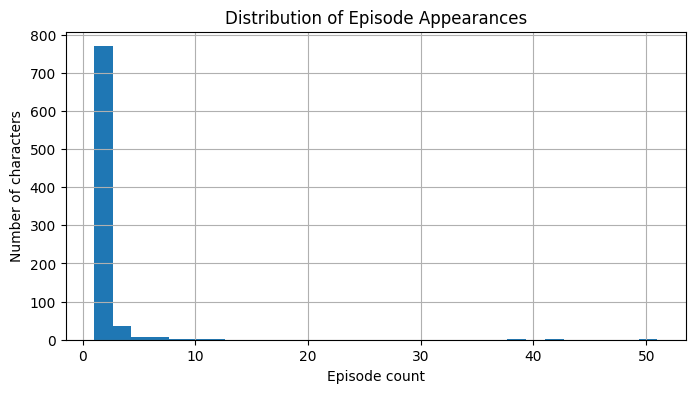

In [39]:
# If you have an episode_count column
episode_counts = df["episode_count"]

# Summary statistics
print(episode_counts.describe())

# Frequency distribution
episode_freq = episode_counts.value_counts().sort_index()
print(episode_freq.head(20))

# Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
episode_counts.hist(bins=30)
plt.xlabel("Episode count")
plt.ylabel("Number of characters")
plt.title("Distribution of Episode Appearances")
plt.show()


In [43]:
# Count unique origins per species
spread = df.groupby("species")["origin_dimension"].nunique().sort_values(ascending=False)
print(spread.head(20))




species
Human                    22
Alien                     6
Animal                    6
Humanoid                  6
Mythological Creature     5
unknown                   3
Robot                     2
Cronenberg                2
Disease                   1
Poopybutthole             1
Name: origin_dimension, dtype: int64


gender
Male          610
Female        148
unknown        49
Genderless     19
Name: count, dtype: int64
gender
Male          73.85
Female        17.92
unknown        5.93
Genderless     2.30
Name: proportion, dtype: float64


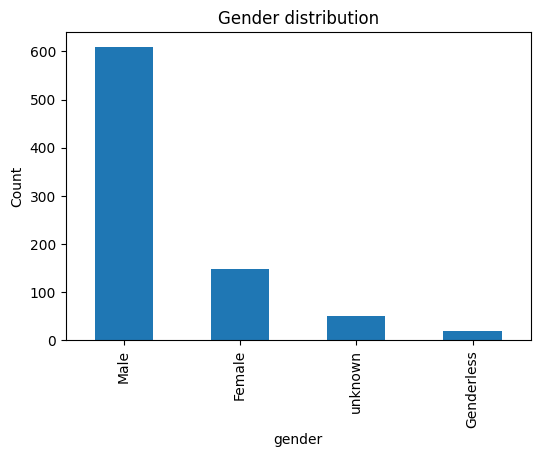

In [44]:
# Counts and percentages
gender_counts = df["gender"].value_counts(dropna=False)
gender_percent = df["gender"].value_counts(normalize=True, dropna=False) * 100

print(gender_counts)
print(gender_percent.round(2))

# Pie chart or bar chart
gender_counts.plot(kind="bar", figsize=(6,4))
plt.title("Gender distribution")
plt.ylabel("Count")
plt.show()


In [46]:
import pandas as pd

df = merged_data_rick_and_morty  # your dataset

results = {}

for col in df.columns:
    # Only analyse columns with string-like values
    if df[col].dtype == "object":
        counts = df[col].value_counts(dropna=False)

        highest_value = counts.idxmax()
        highest_count = counts.max()

        lowest_value = counts.idxmin()
        lowest_count = counts.min()

        results[col] = {
            "highest_value": highest_value,
            "highest_count": highest_count,
            "lowest_value": lowest_value,
            "lowest_count": lowest_count
        }

summary = pd.DataFrame(results).T
print(summary)


                                       highest_value highest_count  \
character_name      Cirque du Soleil Zumanity Member             5   
status                                         Alive           439   
species                                        Human           366   
type                                             NaN           401   
gender                                          Male           610   
origin_type                                   Planet           351   
origin_dimension               Replacement Dimension           307   
location_type                                 Planet           423   
location_dimension             Replacement Dimension           419   

                                   lowest_value lowest_count  
character_name                     Bearded Lady            1  
status                                  unknown          100  
species                                 Disease            6  
type                Human with ants in his eyes